<a href="https://colab.research.google.com/github/KorintusDr/SentimenDonghub/blob/main/Sentimen_Donghub1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BENCHMARKING ALGORITMA MACHINE LEARNING DAN ARSITEKTUR DEEP LEARNING UNTUK KLASIFIKASI SENTIMEN ULASAN APLIKASI DONGHUB**

# **Install & Import Library**

In [1]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00


In [2]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=92f45444495394c063ac6ad11ac0de3dd744c10c723222ba5dd26ea456fb0ca4
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [3]:
import re
import nltk
import warnings
import langdetect
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from nltk.util import ngrams
from langdetect import detect
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from tf_keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.naive_bayes import MultinomialNB
from google_play_scraper import Sort, reviews
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Flatten, Input

from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Concatenate, MultiHeadAttention, Flatten, GRU, Conv1D, GlobalMaxPooling1D, LSTM, Dropout, Dense, Bidirectional

nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Scraping Data**

In [4]:
result, _ = reviews(
    'com.anichin.donghub',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=50000
)

data = pd.DataFrame(result)

data.to_csv('ulasan_donghub.csv', index=False)
print("Data berhasil disimpan ke ulasan_donghub.csv!")

Data berhasil disimpan ke ulasan_donghub.csv!


# **Data Understending**

In [5]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3707c207-72ef-48ef-a710-5fc2c28378b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"makin kesini makin bobrok aplikasinya, makin s...",1,539,5.5,2025-07-25 13:53:07,None,NaT,5.5
1,12c30fbe-c71e-444d-86ac-8bf7fb618ab2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi nya bagus, namun ketika sedang error ...",5,230,5.5,2025-07-25 18:10:19,None,NaT,5.5
2,85c7d1f4-2806-47fa-8926-87ed70c8701a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk developer apk ini, apk nya bagus cuma ad...",4,13,5.5,2025-08-02 23:39:27,None,NaT,5.5
3,6c9ec5d8-c29c-4169-96b8-887990bcc9c9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"semakin kesini aplikasi semakin gajelas, serin...",1,35,5.5,2025-07-30 18:43:14,None,NaT,5.5
4,ef8b74ad-060b-4964-a9ca-be6ab0908cc0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ku kasih bintang 1 ... kami ini nonton buat hi...,1,59,5.5,2025-07-25 13:30:00,None,NaT,5.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19318 entries, 0 to 19317
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              19318 non-null  object        
 1   userName              19318 non-null  object        
 2   userImage             19318 non-null  object        
 3   content               19318 non-null  object        
 4   score                 19318 non-null  int64         
 5   thumbsUpCount         19318 non-null  int64         
 6   reviewCreatedVersion  15426 non-null  object        
 7   at                    19318 non-null  datetime64[ns]
 8   replyContent          86 non-null     object        
 9   repliedAt             86 non-null     datetime64[ns]
 10  appVersion            15426 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.6+ MB


In [7]:
data.shape

(19318, 11)

In [8]:
data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,3892
at,0
replyContent,19232
repliedAt,19232


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [11]:
data['score'].value_counts(normalize=True).sort_index()

,proportion
score,
1,0.254012
2,0.067191
3,0.074801
4,0.079460
5,0.524537


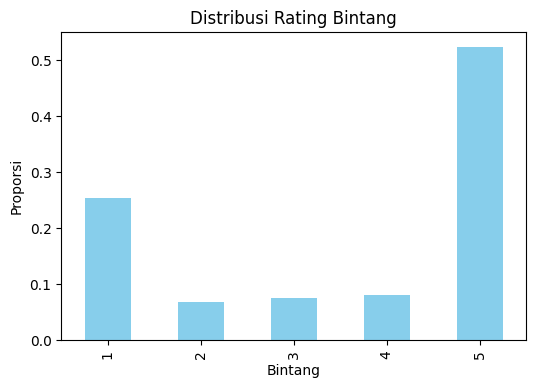

In [12]:
plt.figure(figsize=(6,4))
data['score'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribusi Rating Bintang")
plt.xlabel("Bintang")
plt.ylabel("Proporsi")
plt.show()

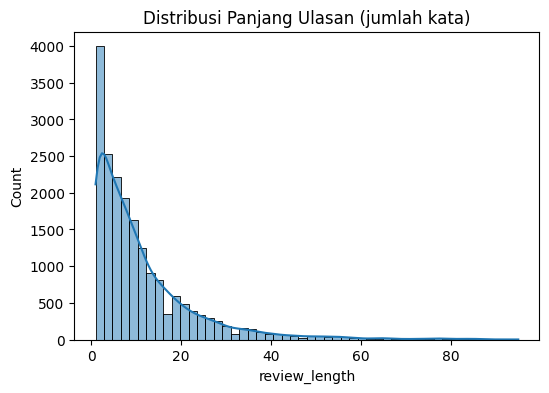


Rata-rata panjang ulasan: 11.103375090589088
Panjang ulasan terpanjang: 95


In [13]:
data['review_length'] = data['content'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Ulasan (jumlah kata)")
plt.show()

print("\nRata-rata panjang ulasan:", data['review_length'].mean())
print("Panjang ulasan terpanjang:", data['review_length'].max())

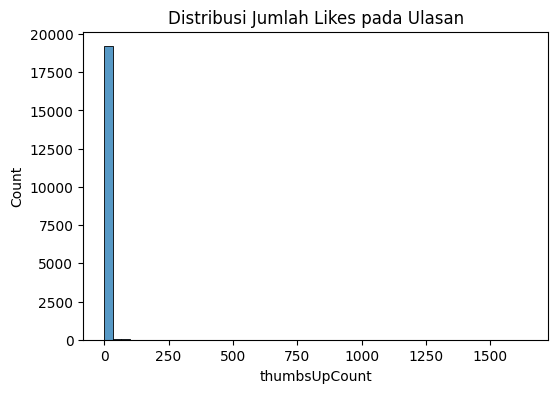

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data['thumbsUpCount'], bins=50, kde=False)
plt.title("Distribusi Jumlah Likes pada Ulasan")
plt.show()

In [15]:
data.describe()

,score,thumbsUpCount,at,repliedAt,review_length
count,19318.000000,19318.000000,19318,86,19318.000000
mean,3.553318,1.379749,2025-02-06 02:41:39.996842240,2024-02-10 16:00:42.488372224,11.103375
min,1.000000,0.000000,2023-12-31 09:30:57,2024-01-10 07:13:47,1.000000
25%,1.000000,0.000000,2024-12-11 07:30:13,2024-01-30 10:46:32,3.000000
50%,5.000000,0.000000,2025-02-18 01:33:45,2024-02-15 03:06:26.500000,7.000000
75%,5.000000,0.000000,2025-05-21 15:04:34.500000,2024-02-15 04:48:52.500000,15.000000
max,5.000000,1643.000000,2025-08-24 08:39:41,2024-05-31 11:03:20,95.000000
std,1.718964,24.255734,NaN,NaN,11.939578


In [16]:
print("\nDeteksi Bahasa Sample:")
for txt in data['content'].dropna().sample(10, random_state=42):
    try:
        print(txt, "->", langdetect.detect(txt))
    except:
        print(txt, "-> ERROR")


Deteksi Bahasa Sample:
min apk donghub gw knp ni kalo login silahkan coba lagi trs tolong di usahakan min -> tl
udah tu 😒 -> id
Gratis dan mantap -> id
aplikasinya sangat memuaskan,untuk para wibu yg belum download aplikasi ini sekarang juga di jamin 100% memuaskan..... -> id
Kasi rating 1 karna setiap bru upload episode psti eror pas mau nnton Tolong di perbaiki !!!!! -> id
Good -> so
min tolong bagusin dong apk nya , masak setiap masuk gak bisa -> id
Donghua nya di perbanyak lagi pang......... -> id
Haiyaaaa mantab banget min -> so
Mantapp minn apknya baguss kualitas juga jernih the beast dahh ni apk -> id


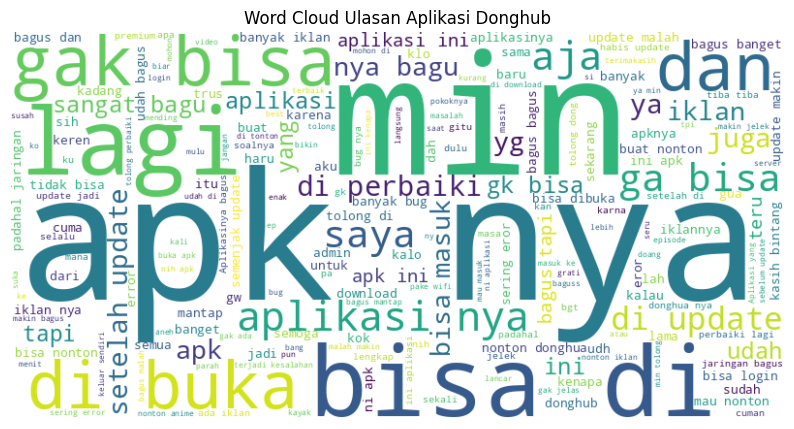

In [17]:
all_text = " ".join(data['content'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Ulasan Aplikasi Donghub")
plt.show()

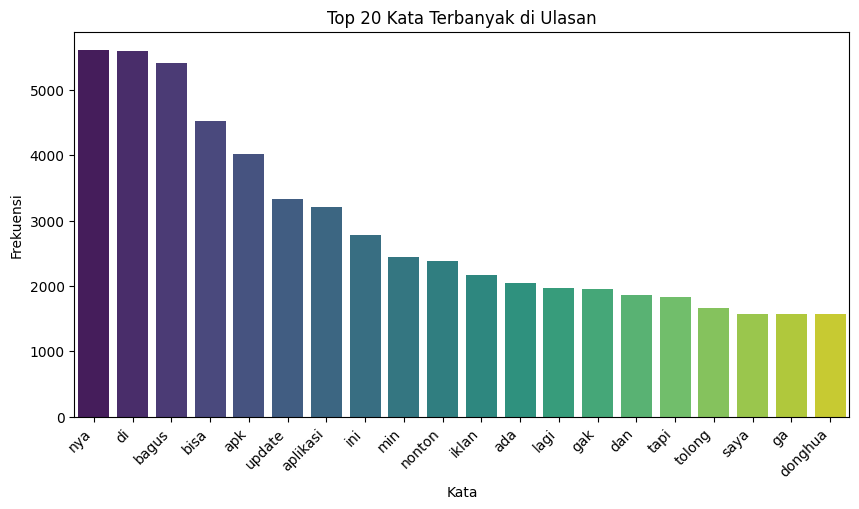

In [18]:
all_text = " ".join(data['content'].dropna().astype(str))
words = re.findall(r'\b\w+\b', all_text.lower())
word_freq = Counter(words)

top_words = word_freq.most_common(20)
labels = [word for word, freq in top_words]
counts = [freq for word, freq in top_words]

plt.figure(figsize=(10,5))
sns.barplot(x=list(labels), y=list(counts), palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Kata Terbanyak di Ulasan")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.show()

In [19]:
def top_words(texts, n=20):
    words = []
    for txt in texts.dropna():
        words.extend(re.findall(r'\w+', txt.lower()))
    counter = Counter(words)
    return counter.most_common(n)

print("\nTop kata Bintang 1:", top_words(data[data['score']==1]['content']))
print("\nTop kata Bintang 5:", top_words(data[data['score']==5]['content']))


Top kata Bintang 1: [('di', 2004), ('update', 1755), ('bisa', 1631), ('nya', 1431), ('apk', 1325), ('makin', 936), ('aplikasi', 926), ('iklan', 874), ('ini', 869), ('malah', 811), ('gak', 803), ('bagus', 738), ('ga', 686), ('banyak', 674), ('lagi', 639), ('nonton', 605), ('buka', 564), ('masuk', 559), ('aja', 554), ('padahal', 543)]

Top kata Bintang 5: [('bagus', 3454), ('nya', 2455), ('apk', 1783), ('di', 1636), ('aplikasi', 1599), ('min', 1330), ('bisa', 1288), ('mantap', 1213), ('ini', 1199), ('nonton', 1139), ('donghua', 1136), ('sangat', 1084), ('dan', 1080), ('ada', 947), ('banget', 809), ('yang', 788), ('tapi', 735), ('iklan', 734), ('saya', 669), ('lagi', 659)]


In [20]:
def get_top_ngrams(texts, n=20, k=2):
    ngram_list = []
    for txt in texts.dropna():
        tokens = re.findall(r'\w+', txt.lower())
        ngram_list.extend(list(ngrams(tokens, k)))
    counter = Counter(ngram_list)
    return counter.most_common(n)

print("\nBigram Bintang 1:", get_top_ngrams(data[data['score']==1]['content']))
print("\nBigram Bintang 5:", get_top_ngrams(data[data['score']==5]['content']))



Bigram Bintang 1: [(('bisa', 'di'), 440), (('gak', 'bisa'), 398), (('di', 'update'), 392), (('di', 'buka'), 363), (('setelah', 'update'), 342), (('ga', 'bisa'), 320), (('apk', 'nya'), 318), (('bisa', 'masuk'), 275), (('update', 'malah'), 234), (('gk', 'bisa'), 227), (('di', 'perbaiki'), 208), (('semenjak', 'update'), 197), (('aplikasi', 'nya'), 184), (('tidak', 'bisa'), 177), (('update', 'makin'), 155), (('bisa', 'login'), 155), (('banyak', 'iklan'), 145), (('iklan', 'nya'), 144), (('banyak', 'bug'), 142), (('padahal', 'jaringan'), 142)]

Bigram Bintang 5: [(('apk', 'nya'), 651), (('sangat', 'bagus'), 497), (('aplikasi', 'nya'), 420), (('nya', 'bagus'), 368), (('nonton', 'donghua'), 361), (('bagus', 'banget'), 349), (('aplikasi', 'ini'), 304), (('bisa', 'di'), 268), (('apk', 'ini'), 242), (('buat', 'nonton'), 197), (('bagus', 'dan'), 178), (('gak', 'bisa'), 169), (('di', 'perbaiki'), 167), (('bagus', 'tapi'), 166), (('di', 'buka'), 164), (('bintang', '5'), 148), (('iklan', 'nya'), 144

In [21]:
print("\nUlasan kosong:", data['content'].isnull().sum())
print("Ulasan sangat pendek (<3 kata):", (data['review_length'] < 3).sum())
print("Ulasan duplikat konten:", data['content'].duplicated().sum())


Ulasan kosong: 0
Ulasan sangat pendek (<3 kata): 3994
Ulasan duplikat konten: 2620


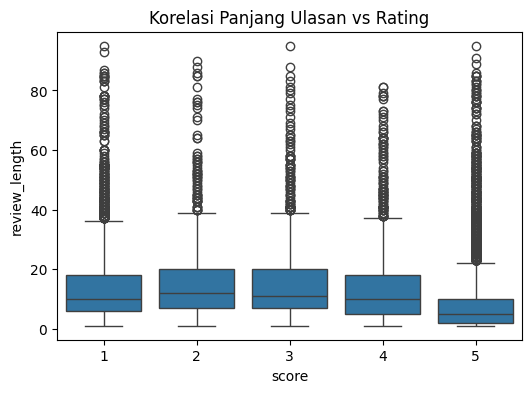

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='score', y='review_length', data=data)
plt.title("Korelasi Panjang Ulasan vs Rating")
plt.show()

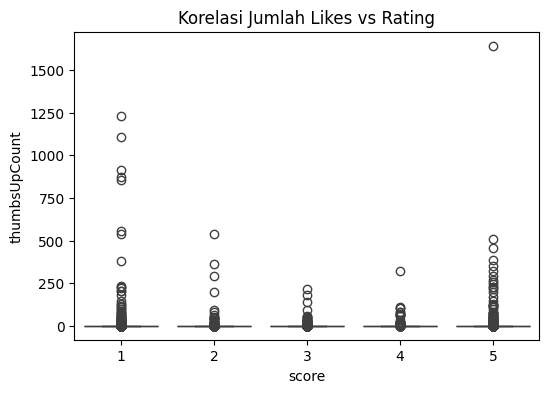

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='score', y='thumbsUpCount', data=data)
plt.title("Korelasi Jumlah Likes vs Rating")
plt.show()

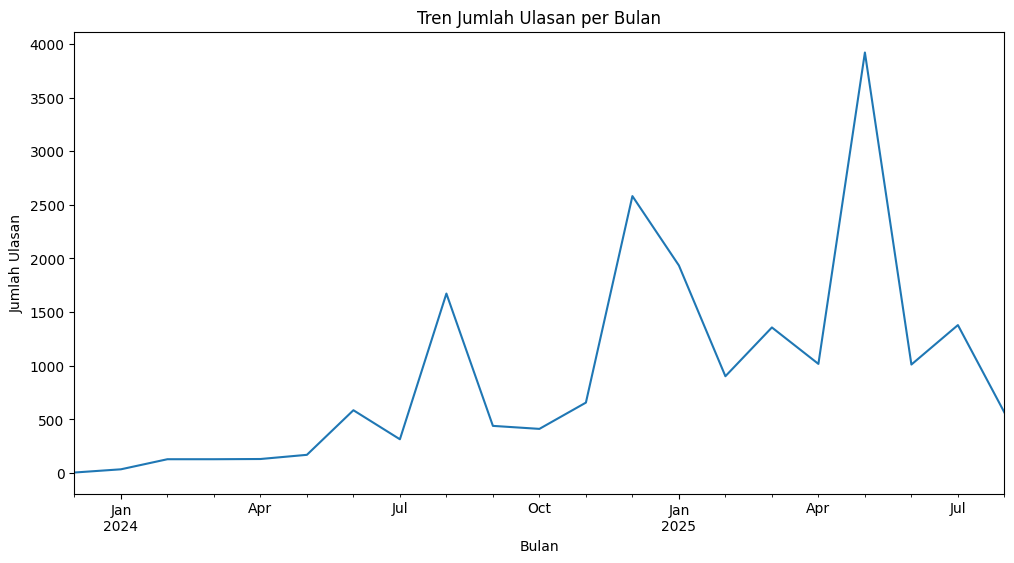

In [24]:
plt.figure(figsize=(12,6))
data['at'].dt.to_period("M").value_counts().sort_index().plot(kind="line")
plt.title("Tren Jumlah Ulasan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Ulasan")
plt.show()

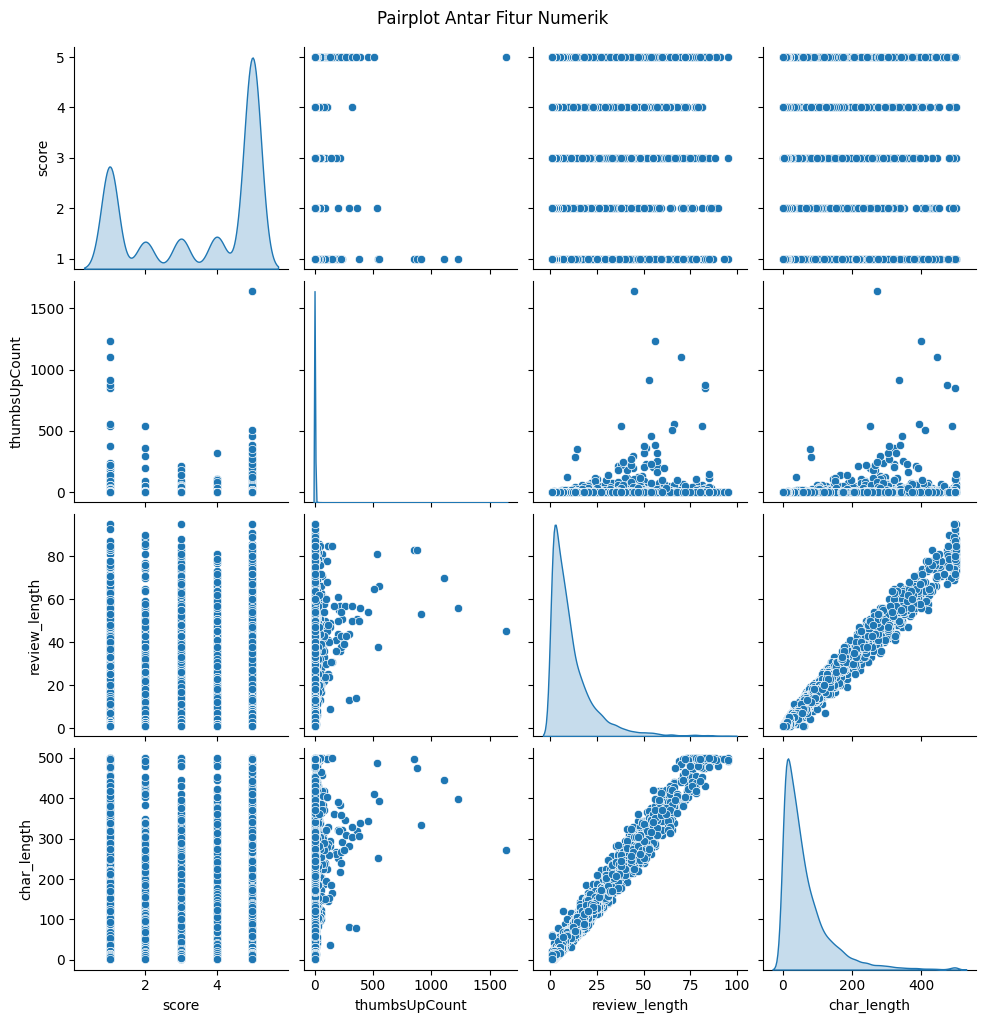

In [25]:
data['review_length'] = data['content'].astype(str).apply(lambda x: len(x.split()))
data['char_length'] = data['content'].astype(str).apply(len)

num_features = ['score', 'thumbsUpCount', 'review_length', 'char_length']
corr_matrix = data[num_features].corr(method='pearson')

sns.pairplot(data[num_features], diag_kind='kde')
plt.suptitle("Pairplot Antar Fitur Numerik", y=1.02)
plt.show()

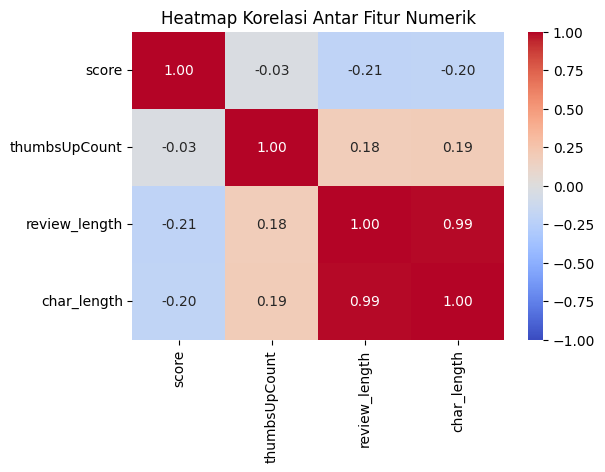

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

# **Preparation / Preprocessing**

In [27]:
data.drop_duplicates(subset='content', inplace=True)
data = data[data['content'].str.split().str.len() >= 3]

In [28]:
def detect_id(text):
    try:
        return detect(text) == 'id'
    except:
        return False

data = data[data['content'].apply(detect_id)]

In [29]:
normalisasi_dict = {
    "gk": "gak", "ga": "gak", "tdk": "tidak", "nggak": "tidak", "gak": "tidak",
    "bgt": "banget", "sy": "saya", "aq": "saya", "km": "kamu", "u": "kamu",
    "dgn": "dengan", "jg": "juga", "tp": "tapi", "dr": "dari", "yg": "yang",
    "aja": "saja", "dlm": "dalam", "kl": "kalau", "trs": "terus",
    "blm": "belum", "sdh": "sudah", "udh": "sudah", "sm": "sama",
    "mo": "mau", "mw": "mau", "bs": "bisa", "bisaaa": "bisa",
    "ok": "oke", "okeey": "oke", "thx": "terima kasih", "makasih": "terima kasih"
}

def normalize_slang(text):
    return " ".join([normalisasi_dict[w] if w in normalisasi_dict else w for w in text.split()])

In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = normalize_slang(text)
    return text

data['clean_content'] = data['content'].apply(clean_text)
data[['content','clean_content']].head()

,content,clean_content
0,"makin kesini makin bobrok aplikasinya, makin s...",makin kesini makin bobrok aplikasinya makin se...
1,"aplikasi nya bagus, namun ketika sedang error ...",aplikasi nya bagus namun ketika sedang error m...
2,"Untuk developer apk ini, apk nya bagus cuma ad...",untuk developer apk ini apk nya bagus cuma ada...
3,"semakin kesini aplikasi semakin gajelas, serin...",semakin kesini aplikasi semakin gajelas sering...
4,ku kasih bintang 1 ... kami ini nonton buat hi...,ku kasih bintang kami ini nonton buat hilangin...


In [31]:
stop_words = set(stopwords.words('indonesian'))
def remove_stopwords(text):
    return ' '.join([w for w in text.split() if w not in stop_words])

data['ml_text'] = data['clean_content'].apply(remove_stopwords)
data[['clean_content','ml_text']].head()

,clean_content,ml_text
0,makin kesini makin bobrok aplikasinya makin se...,kesini bobrok aplikasinya error iklan pengemba...
1,aplikasi nya bagus namun ketika sedang error m...,aplikasi nya bagus error tonton iklan ulang di...
2,untuk developer apk ini apk nya bagus cuma ada...,developer apk apk nya bagus orang betah iklan ...
3,semakin kesini aplikasi semakin gajelas sering...,kesini aplikasi gajelas banget maintenance diu...
4,ku kasih bintang kami ini nonton buat hilangin...,ku kasih bintang nonton hilangin jenuh bosan b...


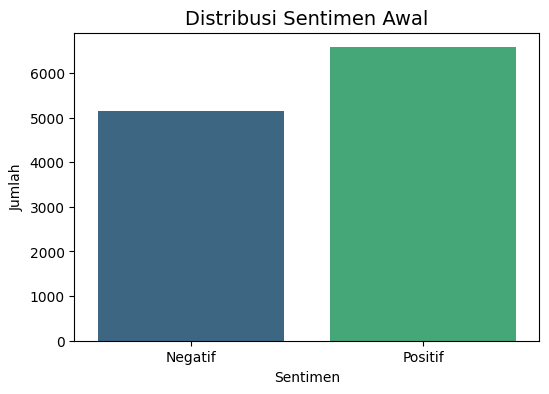

In [32]:
def map_sentiment(score):
    if score <= 2:
        return "Negatif"
    elif score >= 4:
        return "Positif"
    else:
        return None

data['sentiment'] = data['score'].apply(map_sentiment)
data = data[data['sentiment'].notnull()]

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data, palette='viridis')

plt.title("Distribusi Sentimen Awal", fontsize=14)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


In [33]:
def show_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

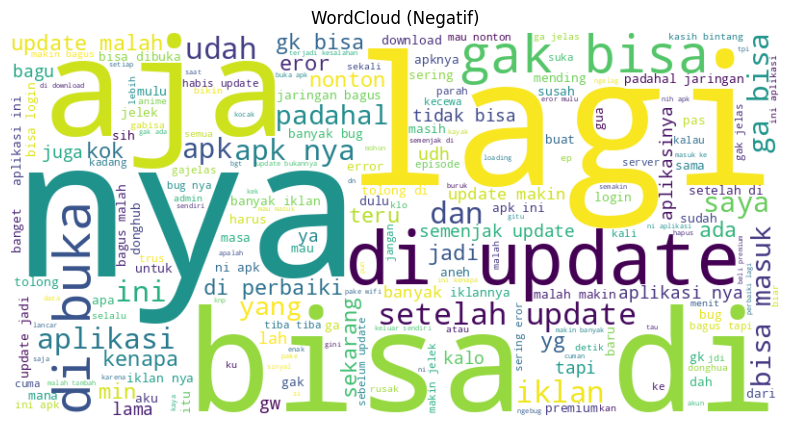

In [34]:
show_wordcloud(data[data['score']==1]['content'].dropna(), "WordCloud (Negatif)")

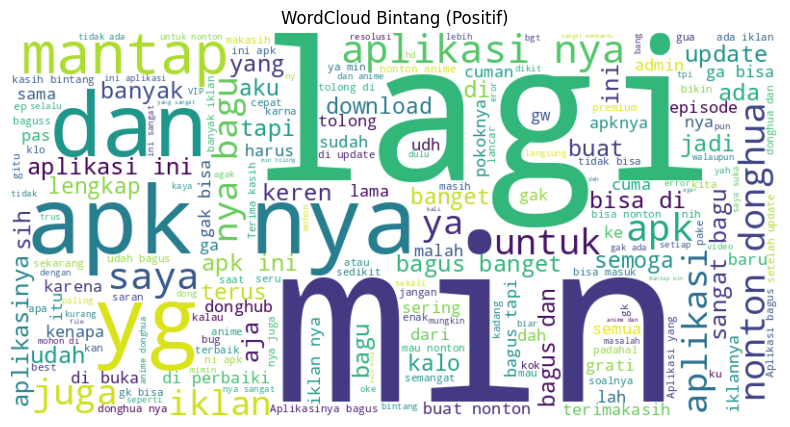

In [35]:
show_wordcloud(data[data['score']==5]['content'].dropna(), "WordCloud Bintang (Positif)")

In [36]:
le = LabelEncoder()
data['sentiment_label'] = le.fit_transform(data['sentiment'])
print("\nMapping Label Sentimen:")
for i, c in enumerate(le.classes_):
    print(f"{c} -> {i}")


Mapping Label Sentimen:
Negatif -> 0
Positif -> 1


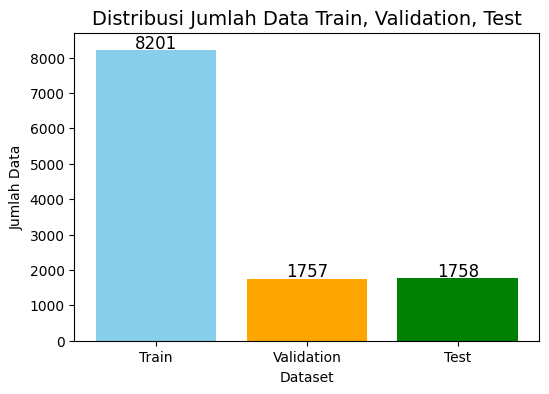

In [37]:
train_text, temp_text, train_labels, temp_labels = train_test_split(
    data['clean_content'], data['sentiment_label'],
    test_size=0.3, stratify=data['sentiment_label'], random_state=42
)
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text, temp_labels,
    test_size=0.5, stratify=temp_labels, random_state=42
)

data_count = {
    "Train": len(train_text),
    "Validation": len(val_text),
    "Test": len(test_text)
}

plt.figure(figsize=(6,4))
plt.bar(data_count.keys(), data_count.values(), color=['skyblue', 'orange', 'green'])
plt.title("Distribusi Jumlah Data Train, Validation, Test", fontsize=14)
plt.ylabel("Jumlah Data")
plt.xlabel("Dataset")
plt.ylim(0, max(data_count.values()) + 500)  # sedikit ruang atas
for i, v in enumerate(data_count.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)
plt.show()

In [38]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_ml = tfidf.fit_transform(train_text)
X_val_ml = tfidf.transform(val_text)
X_test_ml = tfidf.transform(test_text)

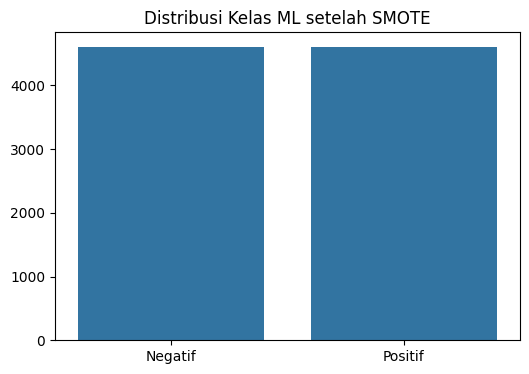

In [39]:
smote = SMOTE(random_state=42)
X_train_ml_res, train_labels_res = smote.fit_resample(X_train_ml, train_labels)

plt.figure(figsize=(6,4))
sns.barplot(x=["Negatif","Positif"], y=np.bincount(train_labels_res))
plt.title("Distribusi Kelas ML setelah SMOTE")
plt.show()

In [40]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)

X_train_seq = tokenizer.texts_to_sequences(train_text)
X_val_seq = tokenizer.texts_to_sequences(val_text)
X_test_seq = tokenizer.texts_to_sequences(test_text)

X_train_dl = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_dl = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_dl = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

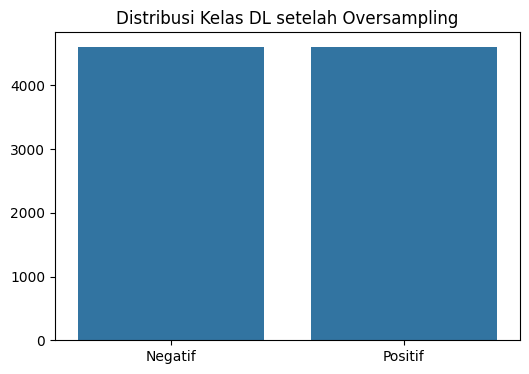

In [41]:
ros = RandomOverSampler(random_state=42)
X_train_dl_res, train_labels_dl_res = ros.fit_resample(X_train_dl, train_labels)

plt.figure(figsize=(6,4))
sns.barplot(x=["Negatif","Positif"], y=np.bincount(train_labels_dl_res))
plt.title("Distribusi Kelas DL setelah Oversampling")
plt.show()

# **Model Machine Learning**

**1. MODEL: Logistic Regression**

In [42]:
logreg = LogisticRegression(
    max_iter=500,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)
logreg.fit(X_train_ml_res, train_labels_res)

val_pred_logreg = logreg.predict(X_val_ml)
test_pred_logreg = logreg.predict(X_test_ml)
val_probs_logreg = logreg.predict_proba(X_val_ml)[:,1]
test_probs_logreg = logreg.predict_proba(X_test_ml)[:,1]

**2. MODEL: Support Vector Machine**

In [43]:
svm_model = SVC(
    kernel='linear',
    probability=True,
    class_weight='balanced',
    random_state=42
)

svm_model.fit(X_train_ml_res, train_labels_res)

val_pred_svm = svm_model.predict(X_val_ml)
test_pred_svm = svm_model.predict(X_test_ml)

val_probs_svm = svm_model.predict_proba(X_val_ml)[:,1]
test_probs_svm = svm_model.predict_proba(X_test_ml)[:,1]

**3. MODEL: Naïve Bayes**

In [44]:
nb = MultinomialNB()
nb.fit(X_train_ml_res, train_labels_res)

val_pred_nb = nb.predict(X_val_ml)
test_pred_nb = nb.predict(X_test_ml)

val_probs_nb = nb.predict_proba(X_val_ml)[:,1]
test_probs_nb = nb.predict_proba(X_test_ml)[:,1]

**4. MODEL: Random Forest**

In [45]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_ml_res, train_labels_res)

val_pred_rf = rf_model.predict(X_val_ml)
test_pred_rf = rf_model.predict(X_test_ml)
val_probs_rf = rf_model.predict_proba(X_val_ml)[:,1]
test_probs_rf = rf_model.predict_proba(X_test_ml)[:,1]

# **Evaluation Model Machine Learning**

**1. Evaluation: Logistic Regression**

In [46]:
print("Validation Set:\n", classification_report(val_labels, val_pred_logreg, target_names=le.classes_))
print("Test Set:\n", classification_report(test_labels, test_pred_logreg, target_names=le.classes_))

Validation Set:
               precision    recall  f1-score   support

     Negatif       0.81      0.86      0.83       771
     Positif       0.89      0.84      0.86       986

    accuracy                           0.85      1757
   macro avg       0.85      0.85      0.85      1757
weighted avg       0.85      0.85      0.85      1757

Test Set:
               precision    recall  f1-score   support

     Negatif       0.82      0.88      0.84       772
     Positif       0.90      0.84      0.87       986

    accuracy                           0.86      1758
   macro avg       0.86      0.86      0.86      1758
weighted avg       0.86      0.86      0.86      1758



In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

auc_val = roc_auc_score(val_labels, val_probs_logreg)
auc_test = roc_auc_score(test_labels, test_probs_logreg)

print("AUC (Validation):", auc_val)
print("AUC (Test):", auc_test)

AUC (Validation): 0.9123040333804259
AUC (Test): 0.929868548276913


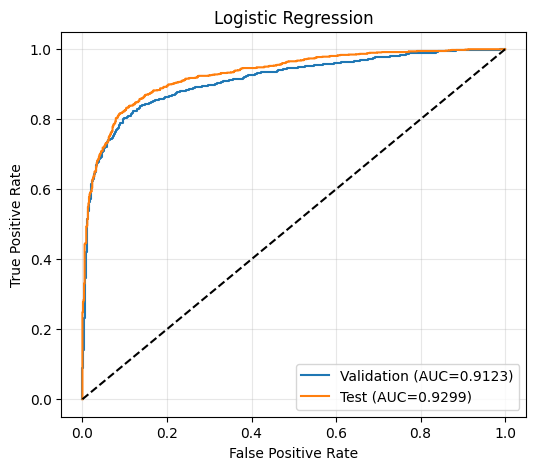

In [48]:
fpr_val, tpr_val, _ = roc_curve(val_labels, val_probs_logreg)
fpr_test, tpr_test, _ = roc_curve(test_labels, test_probs_logreg)

plt.figure(figsize=(6,5))
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC={auc_val:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC={auc_test:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

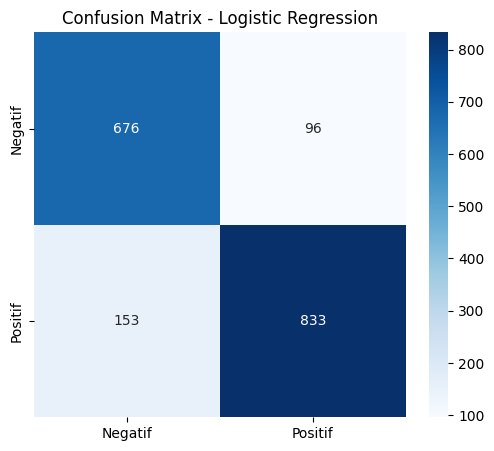

In [49]:
cm_logreg = confusion_matrix(test_labels, test_pred_logreg)
plt.figure(figsize=(6,5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**2. Evaluation: Support Vector Machine**

In [50]:
print("Validation Set:\n", classification_report(val_labels, val_pred_svm, target_names=le.classes_))
print("Test Set:\n", classification_report(test_labels, test_pred_svm, target_names=le.classes_))

Validation Set:
               precision    recall  f1-score   support

     Negatif       0.79      0.87      0.83       771
     Positif       0.89      0.82      0.85       986

    accuracy                           0.84      1757
   macro avg       0.84      0.85      0.84      1757
weighted avg       0.85      0.84      0.84      1757

Test Set:
               precision    recall  f1-score   support

     Negatif       0.82      0.88      0.85       772
     Positif       0.90      0.85      0.87       986

    accuracy                           0.86      1758
   macro avg       0.86      0.86      0.86      1758
weighted avg       0.87      0.86      0.86      1758



In [51]:
auc_val_svm = roc_auc_score(val_labels, val_probs_svm)
auc_test_svm = roc_auc_score(test_labels, test_probs_svm)

print("Area Under Curve (AUC) Validation  :", auc_val_svm)
print("Area Under Curve (AUC) Test        :", auc_test_svm)

Area Under Curve (AUC) Validation  : 0.911673941010726
Area Under Curve (AUC) Test        : 0.9271714626533121


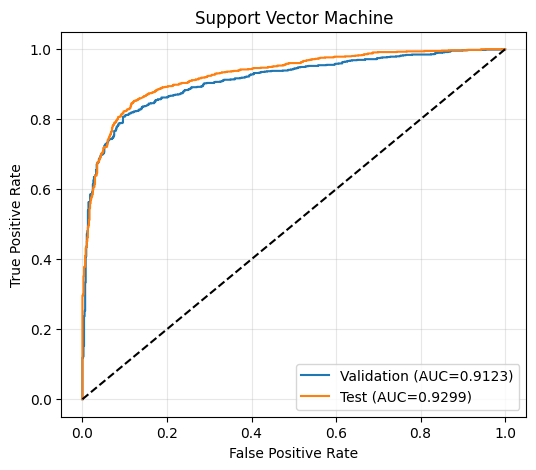

In [52]:
fpr_val, tpr_val, _ = roc_curve(val_labels, val_probs_svm)
fpr_test, tpr_test, _ = roc_curve(test_labels, test_probs_svm)

plt.figure(figsize=(6,5))
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC={auc_val:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC={auc_test:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

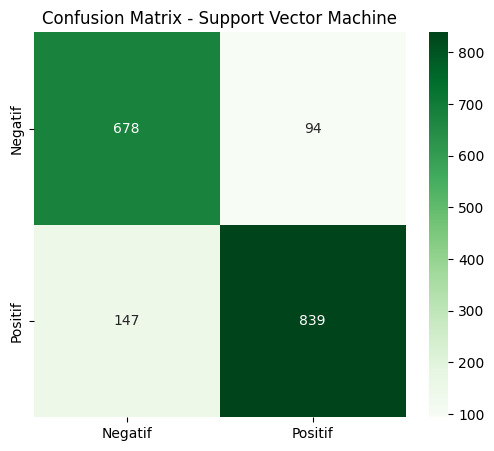

In [53]:
cm_svm = confusion_matrix(test_labels, test_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

**3. Evaluation: Naïve Bayes**

In [54]:
print("Validation Set:\n", classification_report(val_labels, val_pred_nb, target_names=le.classes_))
print("Test Set:\n", classification_report(test_labels, test_pred_nb, target_names=le.classes_))

Validation Set:
               precision    recall  f1-score   support

     Negatif       0.78      0.89      0.83       771
     Positif       0.90      0.81      0.85       986

    accuracy                           0.84      1757
   macro avg       0.84      0.85      0.84      1757
weighted avg       0.85      0.84      0.84      1757

Test Set:
               precision    recall  f1-score   support

     Negatif       0.79      0.90      0.84       772
     Positif       0.91      0.81      0.86       986

    accuracy                           0.85      1758
   macro avg       0.85      0.85      0.85      1758
weighted avg       0.85      0.85      0.85      1758



In [55]:
auc_val_nb = roc_auc_score(val_labels, val_probs_nb)
auc_test_nb = roc_auc_score(test_labels, test_probs_nb)

print("Area Under Curve (AUC) Validation  :", auc_val_nb)
print("Area Under Curve (AUC) Test        :", auc_test_nb)

Area Under Curve (AUC) Validation  : 0.9094929532258361
Area Under Curve (AUC) Test        : 0.9191958139339352


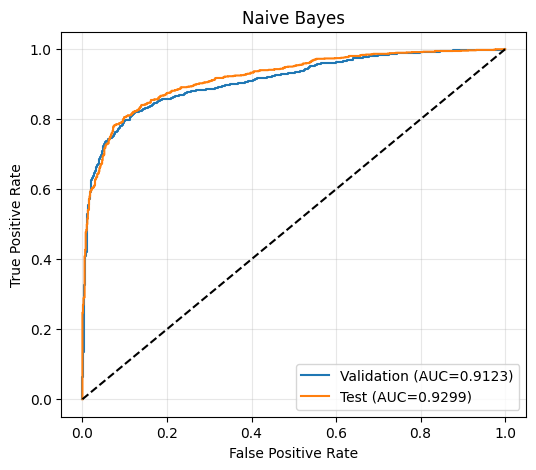

In [56]:
fpr_val, tpr_val, _ = roc_curve(val_labels, val_probs_nb)
fpr_test, tpr_test, _ = roc_curve(test_labels, test_probs_nb)

plt.figure(figsize=(6,5))
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC={auc_val:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC={auc_test:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

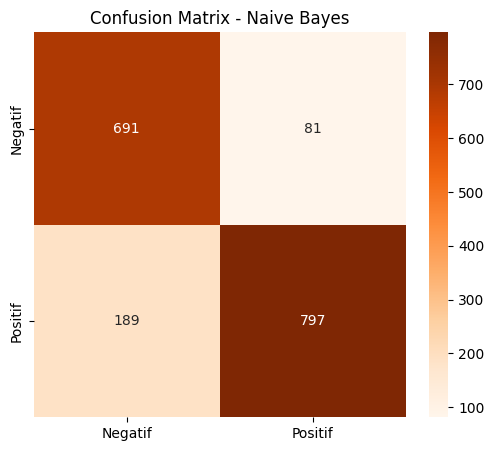

In [57]:
cm_nb = confusion_matrix(test_labels, test_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

**4. Evaluation: Random Forest**

In [58]:
print("Validation Set:\n", classification_report(val_labels, val_pred_rf, target_names=le.classes_))
print("Test Set:\n", classification_report(test_labels, test_pred_rf, target_names=le.classes_))

Validation Set:
               precision    recall  f1-score   support

     Negatif       0.77      0.85      0.81       771
     Positif       0.87      0.80      0.84       986

    accuracy                           0.82      1757
   macro avg       0.82      0.83      0.82      1757
weighted avg       0.83      0.82      0.82      1757

Test Set:
               precision    recall  f1-score   support

     Negatif       0.78      0.86      0.82       772
     Positif       0.88      0.81      0.84       986

    accuracy                           0.83      1758
   macro avg       0.83      0.84      0.83      1758
weighted avg       0.84      0.83      0.83      1758



In [60]:
auc_val_rf = roc_auc_score(val_labels, val_probs_rf)
auc_test_rf = roc_auc_score(test_labels, test_probs_rf)

print("Area Under Curve (AUC) Validation  :", auc_val_rf)
print("Area Under Curve (AUC) Test        :", auc_test_rf)

Area Under Curve (AUC) Validation  : 0.8953139017582076
Area Under Curve (AUC) Test        : 0.9096161021135271


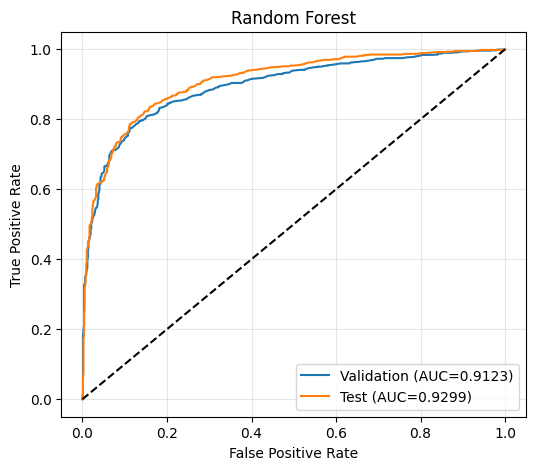

In [61]:
fpr_val, tpr_val, _ = roc_curve(val_labels, val_probs_rf)
fpr_test, tpr_test, _ = roc_curve(test_labels, test_probs_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC={auc_val:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC={auc_test:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

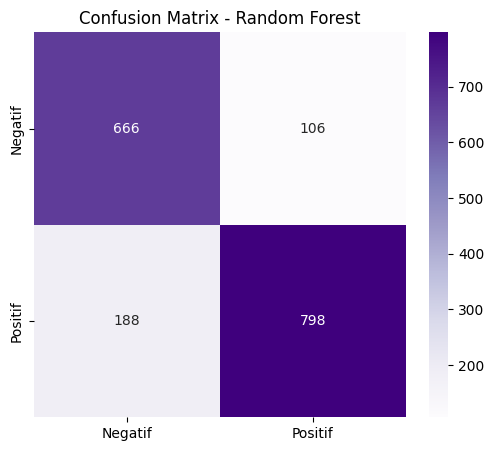

In [62]:
cm_rf = confusion_matrix(test_labels, test_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# **Machine Learning Model Accuracy Comparison**

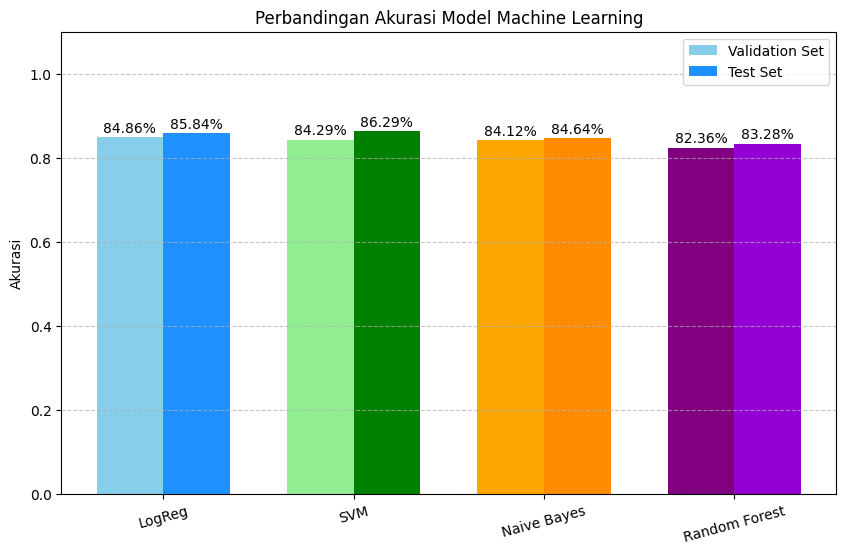

In [63]:
from sklearn.metrics import accuracy_score

accuracy_val = [
    accuracy_score(val_labels, val_pred_logreg),
    accuracy_score(val_labels, val_pred_svm),
    accuracy_score(val_labels, val_pred_nb),
    accuracy_score(val_labels, val_pred_rf)
]

accuracy_test = [
    accuracy_score(test_labels, test_pred_logreg),
    accuracy_score(test_labels, test_pred_svm),
    accuracy_score(test_labels, test_pred_nb),
    accuracy_score(test_labels, test_pred_rf)
]

model_names = ['LogReg', 'SVM', 'Naive Bayes', 'Random Forest']
x = np.arange(len(model_names))
width = 0.35

colors_val = ['skyblue', 'lightgreen', 'orange', 'purple']
colors_test = ['dodgerblue', 'green', 'darkorange', 'darkviolet']

plt.figure(figsize=(10,6))
bars_val = plt.bar(x - width/2, accuracy_val, width, label='Validation Set', color=colors_val)
bars_test = plt.bar(x + width/2, accuracy_test, width, label='Test Set', color=colors_test)

for bar in bars_val:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height*100:.2f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_test:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.ylabel('Akurasi')
plt.ylim(0,1.1)
plt.title('Perbandingan Akurasi Model Machine Learning')
plt.xticks(x, model_names, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Model Deep Learning**

In [64]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels_dl_res),
    y=train_labels_dl_res
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(1.0), 1: np.float64(1.0)}


**1. Model: Long Short-Term Memory (LSTM)**



In [65]:
embedding_dim = 128

lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train_dl_res, train_labels_dl_res,
    validation_data=(X_val_dl, val_labels),
    epochs=20,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 63s 408ms/step - accuracy: 0.6881 - loss: 0.5544 - val_accuracy: 0.8406 - val_loss: 0.3654
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 83s 414ms/step - accuracy: 0.8850 - loss: 0.2879 - val_accuracy: 0.8446 - val_loss: 0.3748
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 81s 410ms/step - accuracy: 0.9117 - loss: 0.2279 - val_accuracy: 0.8435 - val_loss: 0.3984
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 80s 400ms/step - accuracy: 0.9278 - loss: 0.1845 - val_accuracy: 0.8258 - val_loss: 0.4341


**2. Model: Gated Recurrent Unit (GRU)**


In [66]:
embedding_dim = 128
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(GRU(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_gru = gru_model.fit(
    X_train_dl_res, train_labels_dl_res,
    validation_data=(X_val_dl, val_labels),
    epochs=20,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 74s 471ms/step - accuracy: 0.7119 - loss: 0.5536 - val_accuracy: 0.8412 - val_loss: 0.3723
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 79s 448ms/step - accuracy: 0.8824 - loss: 0.2950 - val_accuracy: 0.8389 - val_loss: 0.3779
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 67s 468ms/step - accuracy: 0.9091 - loss: 0.2378 - val_accuracy: 0.8389 - val_loss: 0.4257
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 65s 449ms/step - accuracy: 0.9354 - loss: 0.1730 - val_accuracy: 0.8264 - val_loss: 0.4644


**3. Model: Convolutional Neural Network (CNN)**

In [67]:
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn = cnn_model.fit(
    X_train_dl_res, train_labels_dl_res,
    validation_data=(X_val_dl, val_labels),
    epochs=20,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6575 - loss: 0.6150 - val_accuracy: 0.8304 - val_loss: 0.3798
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.8664 - loss: 0.3311 - val_accuracy: 0.8372 - val_loss: 0.3684
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9129 - loss: 0.2287 - val_accuracy: 0.8361 - val_loss: 0.4066
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9424 - loss: 0.1533 - val_accuracy: 0.8275 - val_loss: 0.4789
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9595 - loss: 0.1152 - val_accuracy: 0.8253 - val_loss: 0.5605


**4. Model: Deep Neural Network (DNN)**

In [68]:
embedding_dim = 128
dnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_dnn = dnn_model.fit(
    X_train_dl_res, train_labels_dl_res,
    validation_data=(X_val_dl, val_labels),
    epochs=20,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.6245 - loss: 0.6177 - val_accuracy: 0.8418 - val_loss: 0.3734
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8899 - loss: 0.2847 - val_accuracy: 0.8389 - val_loss: 0.3793
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9473 - loss: 0.1431 - val_accuracy: 0.8315 - val_loss: 0.4595
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9740 - loss: 0.0703 - val_accuracy: 0.8293 - val_loss: 0.5143


**5. Model: Transformer**

In [69]:
inputs = Input(shape=(max_len,))
x = Embedding(input_dim=max_words, output_dim=128)(inputs)
attn_output = MultiHeadAttention(num_heads=4, key_dim=128)(x, x)
x = GlobalAveragePooling1D()(attn_output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)
transformer_model = Model(inputs=inputs, outputs=outputs)

transformer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_transformer = transformer_model.fit(
    X_train_dl_res, train_labels_dl_res,
    validation_data=(X_val_dl, val_labels),
    epochs=20,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 77s 517ms/step - accuracy: 0.5110 - loss: 0.6928 - val_accuracy: 0.7018 - val_loss: 0.5490
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 73s 505ms/step - accuracy: 0.7592 - loss: 0.4996 - val_accuracy: 0.8344 - val_loss: 0.3676
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 80s 491ms/step - accuracy: 0.8631 - loss: 0.3432 - val_accuracy: 0.8446 - val_loss: 0.3600
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 71s 492ms/step - accuracy: 0.8950 - loss: 0.2668 - val_accuracy: 0.8367 - val_loss: 0.3601
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 81s 487ms/step - accuracy: 0.9157 - loss: 0.2216 - val_accuracy: 0.8315 - val_loss: 0.4203
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 71s 497ms/step - accuracy: 0.9385 - loss: 0.1644 - val_accuracy: 0.8287 - val_loss: 0.5507


**6. Model: ext Convolutional Neural Network (TextCNN)**

In [70]:
inputs = Input(shape=(max_len,))
x = Embedding(input_dim=max_words, output_dim=128)(inputs)

conv3 = Conv1D(128, 3, activation='relu')(x)
conv4 = Conv1D(128, 4, activation='relu')(x)
conv5 = Conv1D(128, 5, activation='relu')(x)

x = Concatenate()([
    GlobalMaxPooling1D()(conv3),
    GlobalMaxPooling1D()(conv4),
    GlobalMaxPooling1D()(conv5)
])

x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)
textcnn_model = Model(inputs=inputs, outputs=outputs)

textcnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_textcnn = textcnn_model.fit(
    X_train_dl_res, train_labels_dl_res,
    validation_data=(X_val_dl, val_labels),
    epochs=20,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 28s 182ms/step - accuracy: 0.6851 - loss: 0.5723 - val_accuracy: 0.8338 - val_loss: 0.3817
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - accuracy: 0.8814 - loss: 0.2896 - val_accuracy: 0.8219 - val_loss: 0.3865
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - accuracy: 0.9362 - loss: 0.1838 - val_accuracy: 0.8219 - val_loss: 0.4319
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.9666 - loss: 0.1009 - val_accuracy: 0.8344 - val_loss: 0.4791


# **Evaluation Model Deep Learning**

**1. Evaluation: Long Short-Term Memory (LSTM)**

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_val_pred_prob = lstm_model.predict(X_val_dl).flatten()
y_test_pred_prob = lstm_model.predict(X_test_dl).flatten()

roc_auc_val_lstm = roc_auc_score(val_labels, y_val_pred_prob)
roc_auc_test_lstm = roc_auc_score(test_labels, y_test_pred_prob)

print("Validation ROC-AUC: {:.4f}".format(roc_auc_val_lstm))
print("Test ROC-AUC: {:.4f}".format(roc_auc_test_lstm))

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step
Validation ROC-AUC: 0.9125
Test ROC-AUC: 0.9218


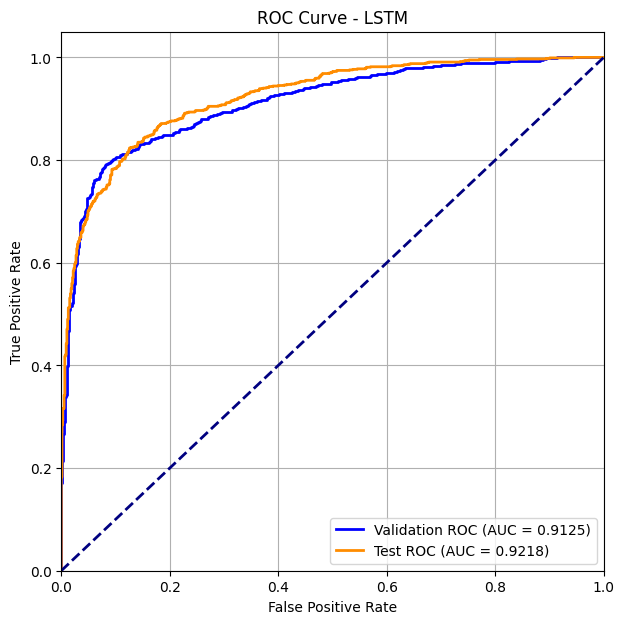

In [72]:
fpr_val, tpr_val, _ = roc_curve(val_labels, y_val_pred_prob)
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_pred_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC (AUC = {:.4f})'.format(roc_auc_val_lstm))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC (AUC = {:.4f})'.format(roc_auc_test_lstm))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [73]:
train_results = lstm_model.evaluate(X_train_dl_res, train_labels_dl_res, verbose=0)
test_results = lstm_model.evaluate(X_test_dl, test_labels, verbose=0)

print("LSTM - Training Loss: {:.5f}".format(train_results[0]))
print("LSTM - Training Accuracy: {:.2f}%".format(train_results[1]*100))

print("LSTM - Test Loss: {:.5f}".format(test_results[0]))
print("LSTM - Test Accuracy: {:.2f}%".format(test_results[1]*100))

LSTM - Training Loss: 0.30169
LSTM - Training Accuracy: 87.91%
LSTM - Test Loss: 0.35397
LSTM - Test Accuracy: 84.30%


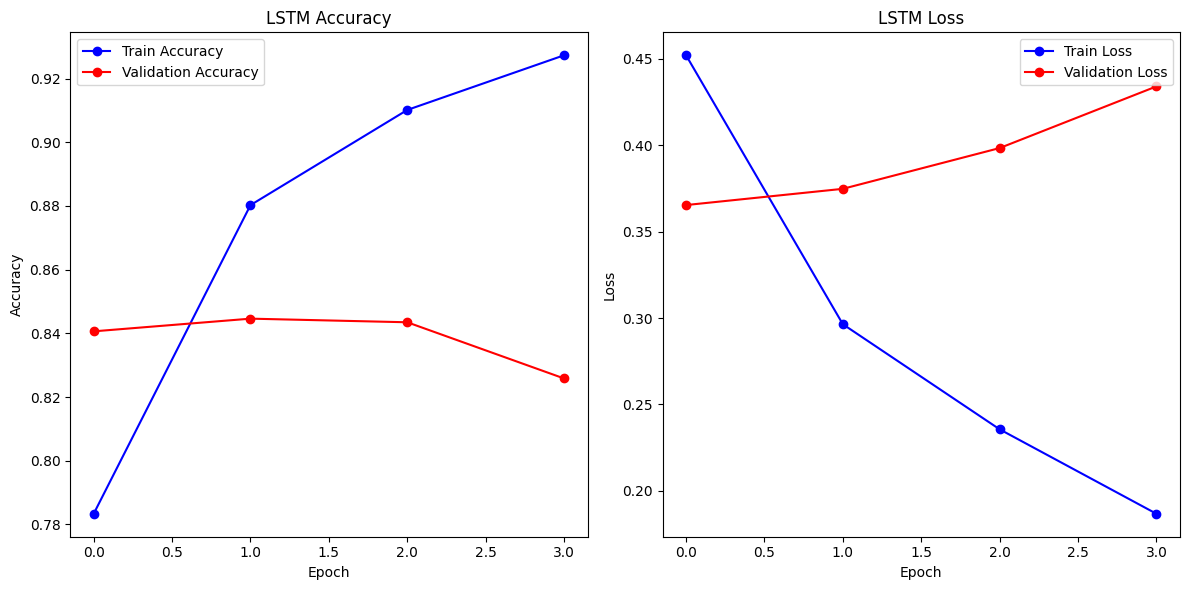

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('LSTM Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_lstm.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('LSTM Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [75]:
y_test_pred_prob = lstm_model.predict(X_test_dl)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report (LSTM) ===")
print(classification_report(test_labels, y_test_pred, target_names=le.classes_))

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step

=== Classification Report (LSTM) ===
              precision    recall  f1-score   support

     Negatif       0.80      0.87      0.83       772
     Positif       0.89      0.83      0.86       986

    accuracy                           0.84      1758
   macro avg       0.84      0.85      0.84      1758
weighted avg       0.85      0.84      0.84      1758



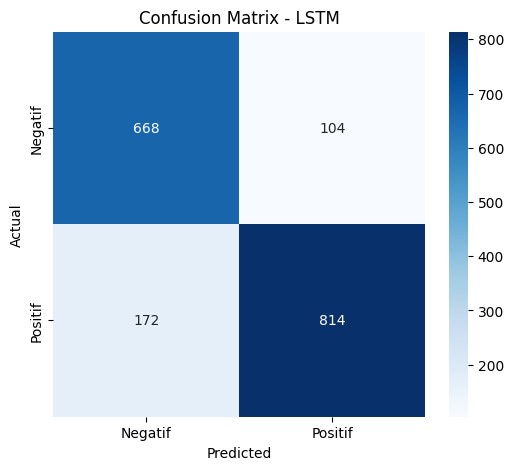

In [76]:
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LSTM')
plt.show()

**2. Evaluation: Gated Recurrent Unit (GRU)**

In [77]:
y_val_pred_prob = gru_model.predict(X_val_dl)
y_test_pred_prob = gru_model.predict(X_test_dl)

roc_auc_val_gru = roc_auc_score(val_labels, y_val_pred_prob)
roc_auc_test_gru = roc_auc_score(test_labels, y_test_pred_prob)

print("GRU - Validation AUC: {:.4f}".format(roc_auc_val_gru))
print("GRU - Test AUC: {:.4f}".format(roc_auc_test_gru))

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
GRU - Validation AUC: 0.9146
GRU - Test AUC: 0.9214


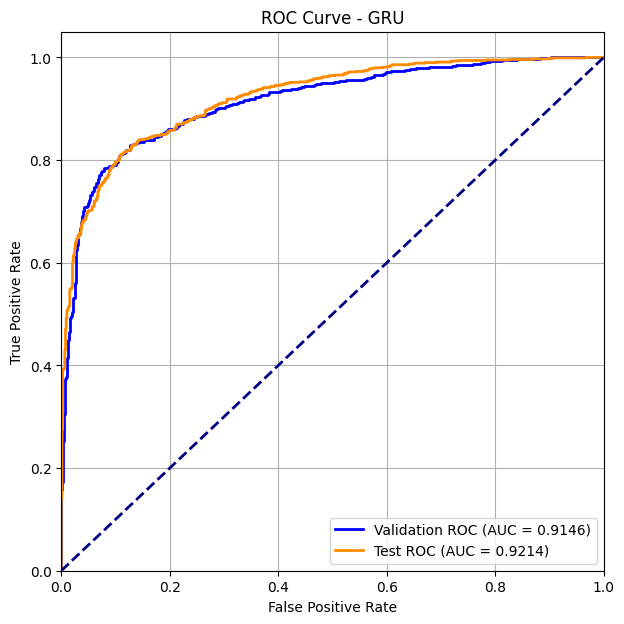

In [78]:
fpr_val, tpr_val, _ = roc_curve(val_labels, y_val_pred_prob)
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_pred_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC (AUC = {:.4f})'.format(roc_auc_val_gru))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC (AUC = {:.4f})'.format(roc_auc_test_gru))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GRU')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [79]:
train_results = gru_model.evaluate(X_train_dl_res, train_labels_dl_res, verbose=0)
test_results = gru_model.evaluate(X_test_dl, test_labels, verbose=0)

print("GRU - Training Loss: {:.5f}".format(train_results[0]))
print("GRU - Training Accuracy: {:.2f}%".format(train_results[1]*100))

print("GRU - Test Loss: {:.5f}".format(test_results[0]))
print("GRU - Test Accuracy: {:.2f}%".format(test_results[1]*100))

GRU - Training Loss: 0.30064
GRU - Training Accuracy: 87.85%
GRU - Test Loss: 0.36213
GRU - Test Accuracy: 83.90%


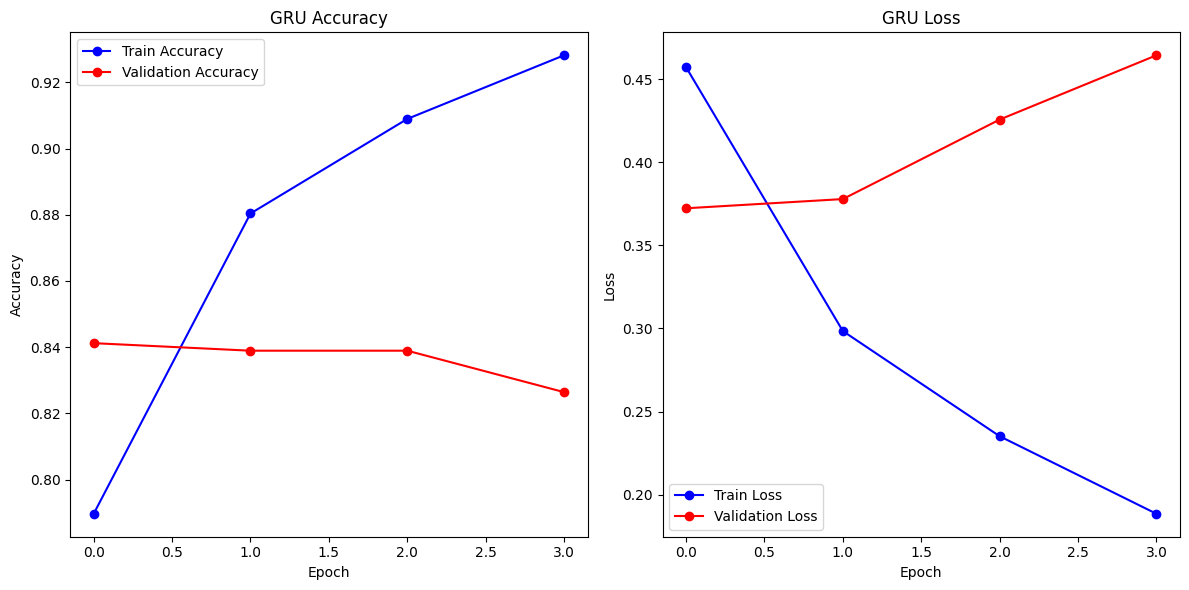

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_gru.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('GRU Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_gru.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_gru.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('GRU Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [81]:
y_test_pred_prob = gru_model.predict(X_test_dl)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report (GRU) ===")
print(classification_report(test_labels, y_test_pred, target_names=le.classes_))

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step

=== Classification Report (GRU) ===
              precision    recall  f1-score   support

     Negatif       0.77      0.91      0.83       772
     Positif       0.91      0.79      0.85       986

    accuracy                           0.84      1758
   macro avg       0.84      0.85      0.84      1758
weighted avg       0.85      0.84      0.84      1758



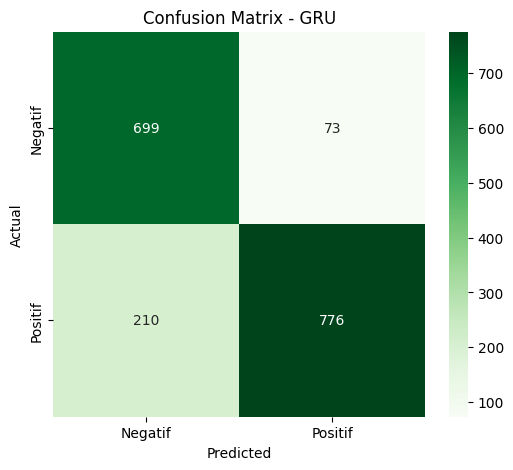

In [82]:
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GRU')
plt.show()

**3. Evaluation: Convolutional Neural Network (CNN)**

In [83]:
y_val_pred_prob = cnn_model.predict(X_val_dl)
y_test_pred_prob = cnn_model.predict(X_test_dl)

roc_auc_val_cnn = roc_auc_score(val_labels, y_val_pred_prob)
roc_auc_test_cnn = roc_auc_score(test_labels, y_test_pred_prob)

print("CNN - Validation AUC: {:.4f}".format(roc_auc_val_cnn))
print("CNN - Test AUC: {:.4f}".format(roc_auc_test_cnn))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
CNN - Validation AUC: 0.9151
CNN - Test AUC: 0.9202


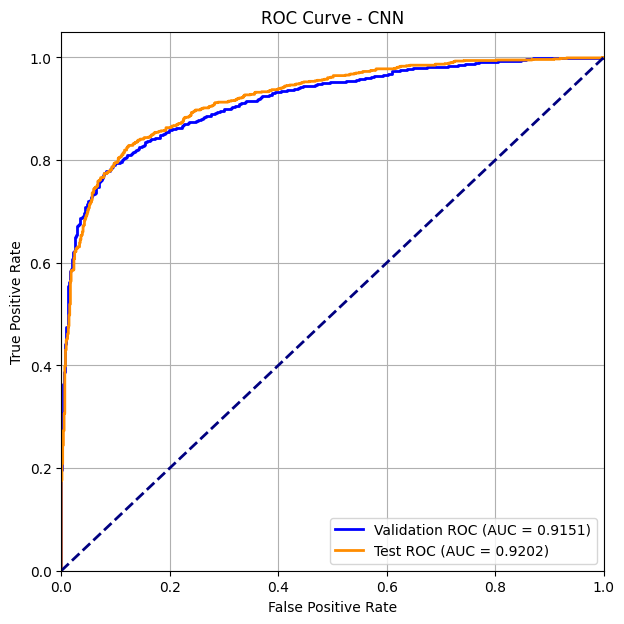

In [84]:
fpr_val, tpr_val, _ = roc_curve(val_labels, y_val_pred_prob)
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_pred_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC (AUC = {:.4f})'.format(roc_auc_val_cnn))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC (AUC = {:.4f})'.format(roc_auc_test_cnn))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [85]:
train_results = cnn_model.evaluate(X_train_dl_res, train_labels_dl_res, verbose=0)
test_results = cnn_model.evaluate(X_test_dl, test_labels, verbose=0)

print("CNN - Training Loss: {:.5f}".format(train_results[0]))
print("CNN - Training Accuracy: {:.2f}%".format(train_results[1]*100))

print("CNN - Test Loss: {:.5f}".format(test_results[0]))
print("CNN - Test Accuracy: {:.2f}%".format(test_results[1]*100))

CNN - Training Loss: 0.20652
CNN - Training Accuracy: 92.81%
CNN - Test Loss: 0.35784
CNN - Test Accuracy: 84.70%


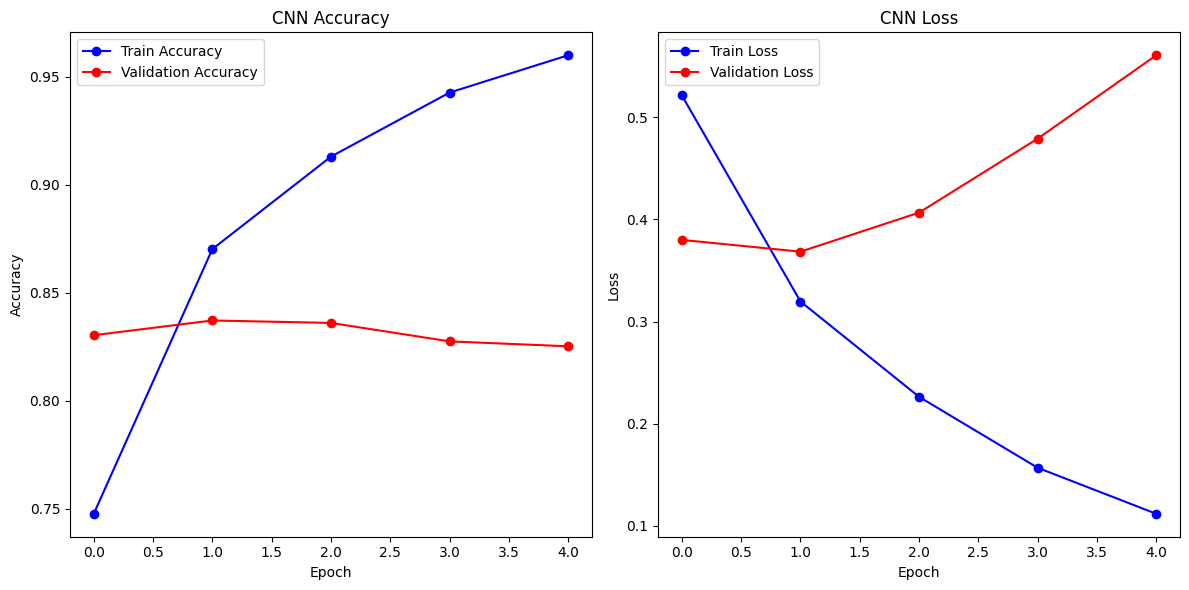

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('CNN Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_cnn.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('CNN Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [87]:
y_test_pred_prob = cnn_model.predict(X_test_dl)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report (CNN) ===")
print(classification_report(test_labels, y_test_pred, target_names=le.classes_))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

=== Classification Report (CNN) ===
              precision    recall  f1-score   support

     Negatif       0.81      0.86      0.83       772
     Positif       0.88      0.84      0.86       986

    accuracy                           0.85      1758
   macro avg       0.84      0.85      0.85      1758
weighted avg       0.85      0.85      0.85      1758



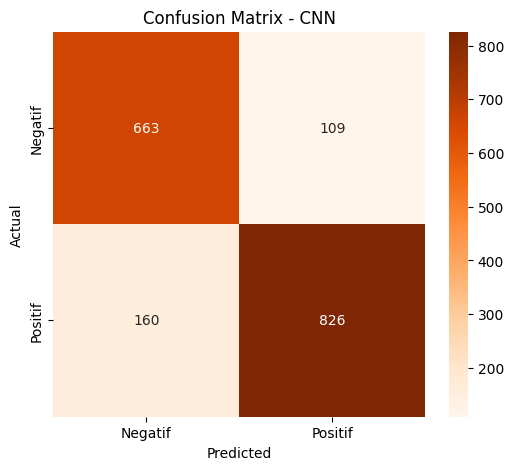

In [88]:
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

**4. Evaluation: Deep Neural Network (DNN)**

In [89]:
y_val_pred_prob = dnn_model.predict(X_val_dl)
y_test_pred_prob = dnn_model.predict(X_test_dl)

roc_auc_val_dnn = roc_auc_score(val_labels, y_val_pred_prob)
roc_auc_test_dnn = roc_auc_score(test_labels, y_test_pred_prob)

print("DNN - Validation AUC: {:.4f}".format(roc_auc_val_dnn))
print("DNN - Test AUC: {:.4f}".format(roc_auc_test_dnn))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
DNN - Validation AUC: 0.9119
DNN - Test AUC: 0.9258


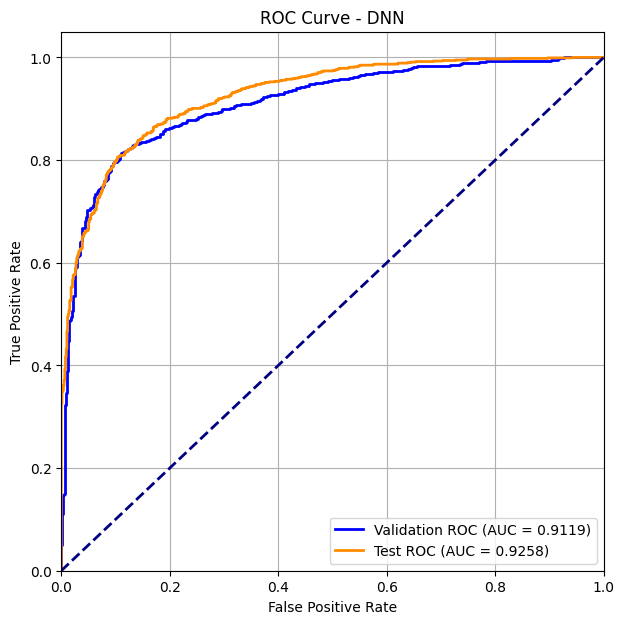

In [90]:
fpr_val, tpr_val, _ = roc_curve(val_labels, y_val_pred_prob)
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_pred_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC (AUC = {:.4f})'.format(roc_auc_val_dnn))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC (AUC = {:.4f})'.format(roc_auc_test_dnn))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [91]:
train_results = dnn_model.evaluate(X_train_dl_res, train_labels_dl_res, verbose=0)
test_results = dnn_model.evaluate(X_test_dl, test_labels, verbose=0)

print("DNN - Training Loss: {:.5f}".format(train_results[0]))
print("DNN - Training Accuracy: {:.2f}%".format(train_results[1]*100))

print("DNN - Test Loss: {:.5f}".format(test_results[0]))
print("DNN - Test Accuracy: {:.2f}%".format(test_results[1]*100))

DNN - Training Loss: 0.28495
DNN - Training Accuracy: 88.99%
DNN - Test Loss: 0.35479
DNN - Test Accuracy: 84.19%


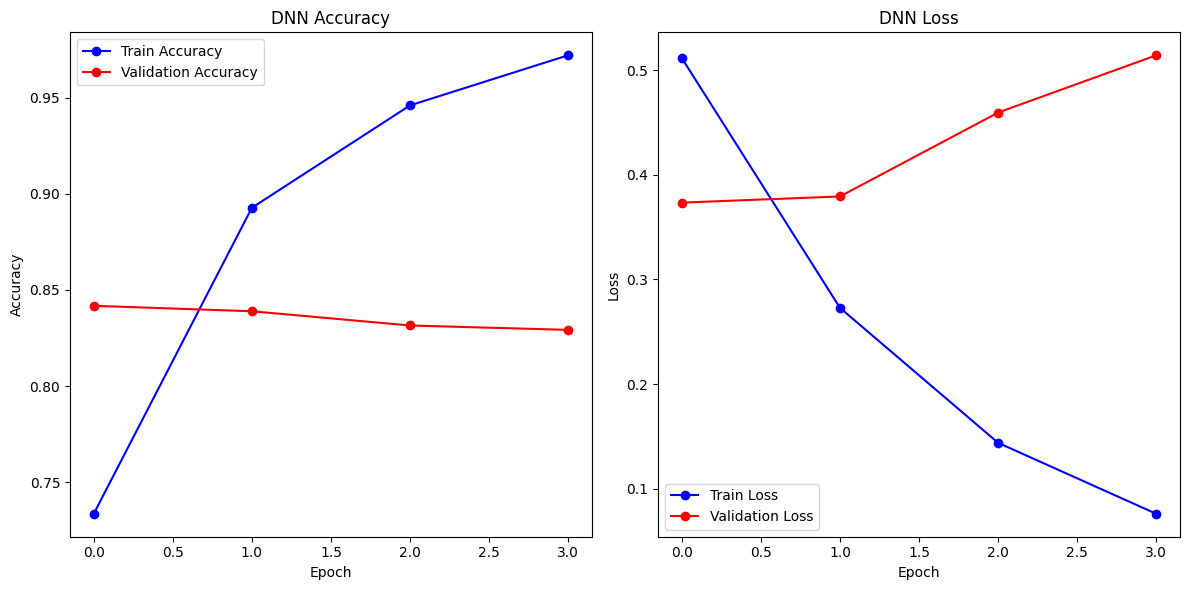

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_dnn.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('DNN Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_dnn.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_dnn.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('DNN Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [93]:
y_test_pred_prob = dnn_model.predict(X_test_dl)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report (DNN) ===")
print(classification_report(test_labels, y_test_pred, target_names=le.classes_))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

=== Classification Report (DNN) ===
              precision    recall  f1-score   support

     Negatif       0.78      0.90      0.83       772
     Positif       0.91      0.80      0.85       986

    accuracy                           0.84      1758
   macro avg       0.84      0.85      0.84      1758
weighted avg       0.85      0.84      0.84      1758



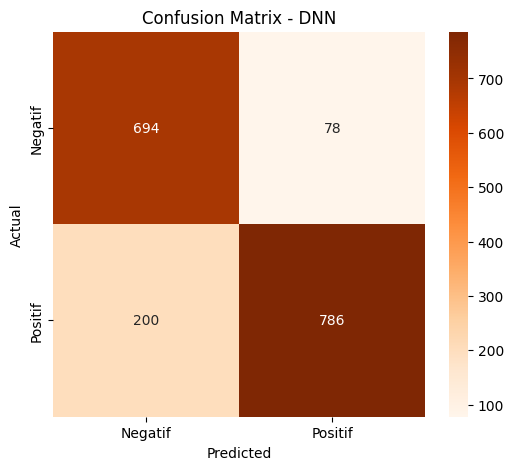

In [94]:
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DNN')
plt.show()

**5. Evaluation: Transformer**

In [95]:
y_val_pred_prob = transformer_model.predict(X_val_dl)
y_test_pred_prob = transformer_model.predict(X_test_dl)

roc_auc_val_tfr = roc_auc_score(val_labels, y_val_pred_prob)
roc_auc_test_tfr = roc_auc_score(test_labels, y_test_pred_prob)

print("Transformer - Validation AUC: {:.4f}".format(roc_auc_val_tfr))
print("Transformer - Test AUC: {:.4f}".format(roc_auc_test_tfr))

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
Transformer - Validation AUC: 0.9175
Transformer - Test AUC: 0.9278


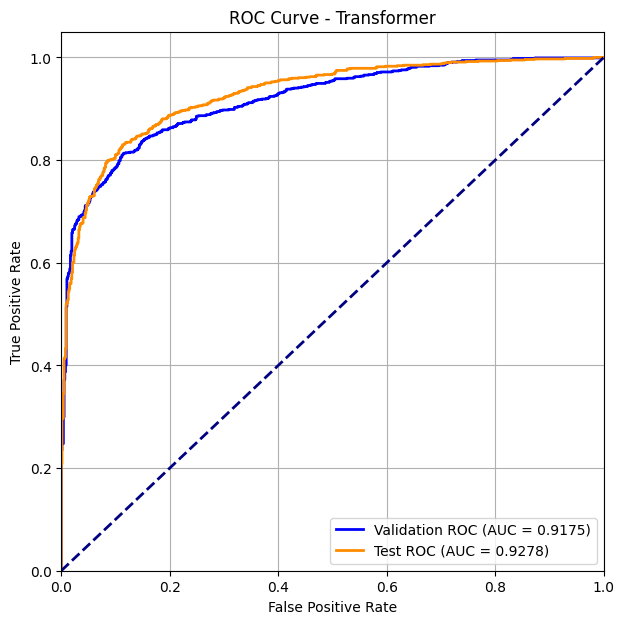

In [97]:
fpr_val, tpr_val, _ = roc_curve(val_labels, y_val_pred_prob)
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_pred_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC (AUC = {:.4f})'.format(roc_auc_val_tfr))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC (AUC = {:.4f})'.format(roc_auc_test_tfr))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Transformer')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [98]:
train_results = transformer_model.evaluate(X_train_dl_res, train_labels_dl_res, verbose=0)
test_results = transformer_model.evaluate(X_test_dl, test_labels, verbose=0)

print("Transformer - Training Loss: {:.5f}".format(train_results[0]))
print("Transformer - Training Accuracy: {:.2f}%".format(train_results[1]*100))

print("Transformer - Test Loss: {:.5f}".format(test_results[0]))
print("Transformer - Test Accuracy: {:.2f}%".format(test_results[1]*100))

Transformer - Training Loss: 0.27119
Transformer - Training Accuracy: 89.40%
Transformer - Test Loss: 0.34238
Transformer - Test Accuracy: 85.27%


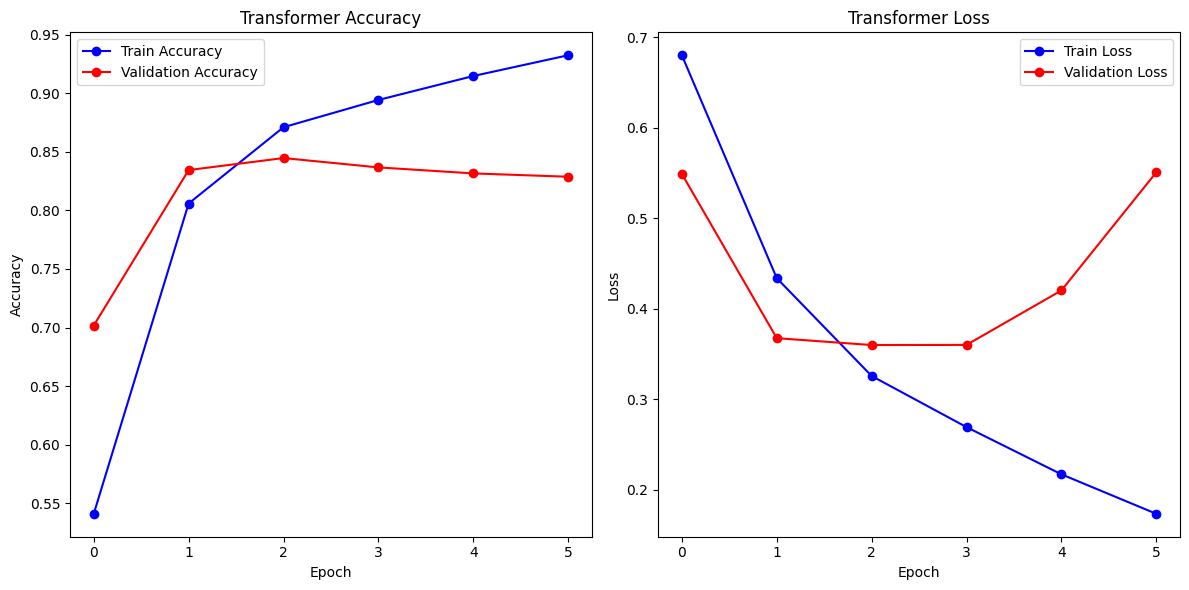

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_transformer.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Transformer Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_transformer.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_transformer.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Transformer Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [100]:
y_test_pred_prob = transformer_model.predict(X_test_dl)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report (Transformer) ===")
print(classification_report(test_labels, y_test_pred, target_names=le.classes_))

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step

=== Classification Report (Transformer) ===
              precision    recall  f1-score   support

     Negatif       0.80      0.89      0.84       772
     Positif       0.90      0.83      0.86       986

    accuracy                           0.85      1758
   macro avg       0.85      0.86      0.85      1758
weighted avg       0.86      0.85      0.85      1758



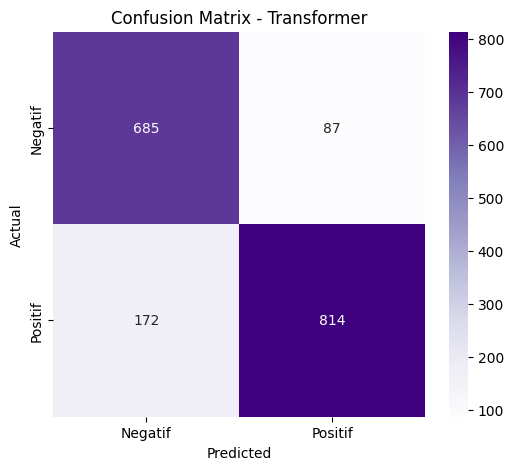

In [101]:
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Transformer')
plt.show()


**6. Evaluation: ext Convolutional Neural Network (TextCNN)**

In [102]:
y_val_pred_prob = textcnn_model.predict(X_val_dl)
y_test_pred_prob = textcnn_model.predict(X_test_dl)

roc_auc_val_tcnn = roc_auc_score(val_labels, y_val_pred_prob)
roc_auc_test_tcnn = roc_auc_score(test_labels, y_test_pred_prob)

print("TextCNN - Validation AUC: {:.4f}".format(roc_auc_val_tcnn))
print("TextCNN - Test AUC: {:.4f}".format(roc_auc_test_tcnn))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
TextCNN - Validation AUC: 0.9072
TextCNN - Test AUC: 0.9222


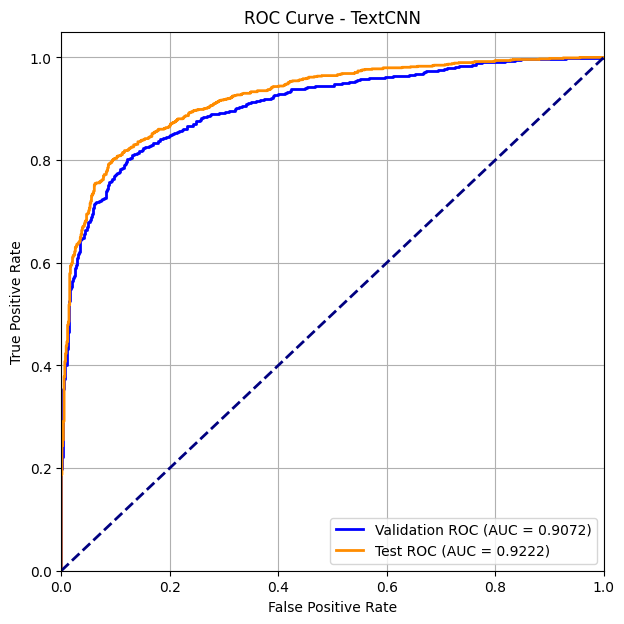

In [103]:
fpr_val, tpr_val, _ = roc_curve(val_labels, y_val_pred_prob)
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_pred_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC (AUC = {:.4f})'.format(roc_auc_val_tcnn))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC (AUC = {:.4f})'.format(roc_auc_test_tcnn))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TextCNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [104]:
train_results = textcnn_model.evaluate(X_train_dl_res, train_labels_dl_res, verbose=0)
test_results = textcnn_model.evaluate(X_test_dl, test_labels, verbose=0)

print("TextCNN - Training Loss: {:.5f}".format(train_results[0]))
print("TextCNN - Training Accuracy: {:.2f}%".format(train_results[1]*100))

print("TextCNN - Test Loss: {:.5f}".format(test_results[0]))
print("TextCNN - Test Accuracy: {:.2f}%".format(test_results[1]*100))

TextCNN - Training Loss: 0.28376
TextCNN - Training Accuracy: 88.90%
TextCNN - Test Loss: 0.35089
TextCNN - Test Accuracy: 84.47%


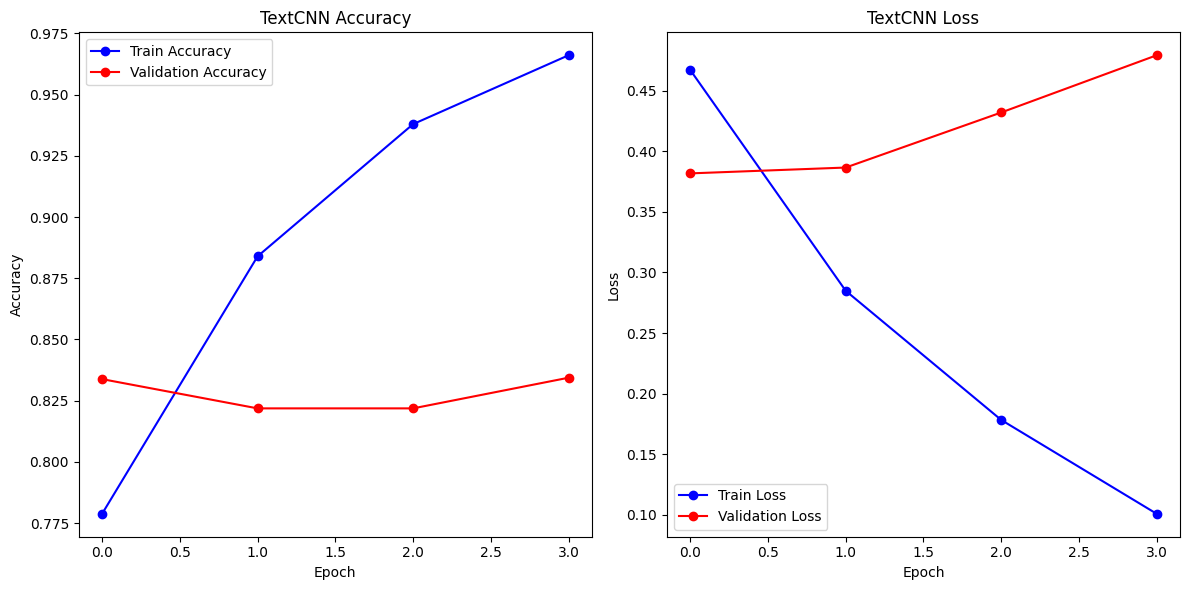

In [105]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_textcnn.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history_textcnn.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('TextCNN Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_textcnn.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_textcnn.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('TextCNN Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [106]:
y_test_pred_prob = textcnn_model.predict(X_test_dl)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report (TextCNN) ===")
print(classification_report(test_labels, y_test_pred, target_names=le.classes_))

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step

=== Classification Report (TextCNN) ===
              precision    recall  f1-score   support

     Negatif       0.80      0.87      0.83       772
     Positif       0.89      0.83      0.86       986

    accuracy                           0.84      1758
   macro avg       0.84      0.85      0.84      1758
weighted avg       0.85      0.84      0.85      1758



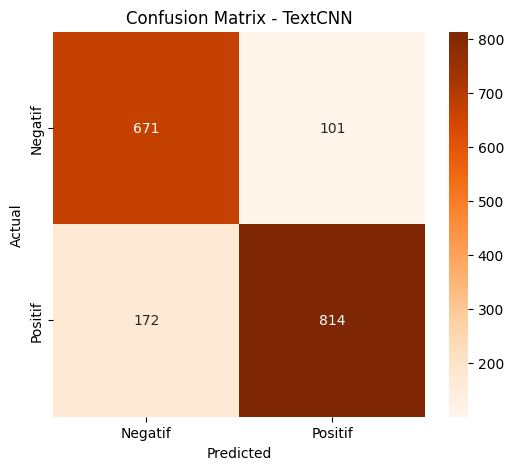

In [107]:
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TextCNN')
plt.show()

# **Deep Learning Model Accuracy Comparison**

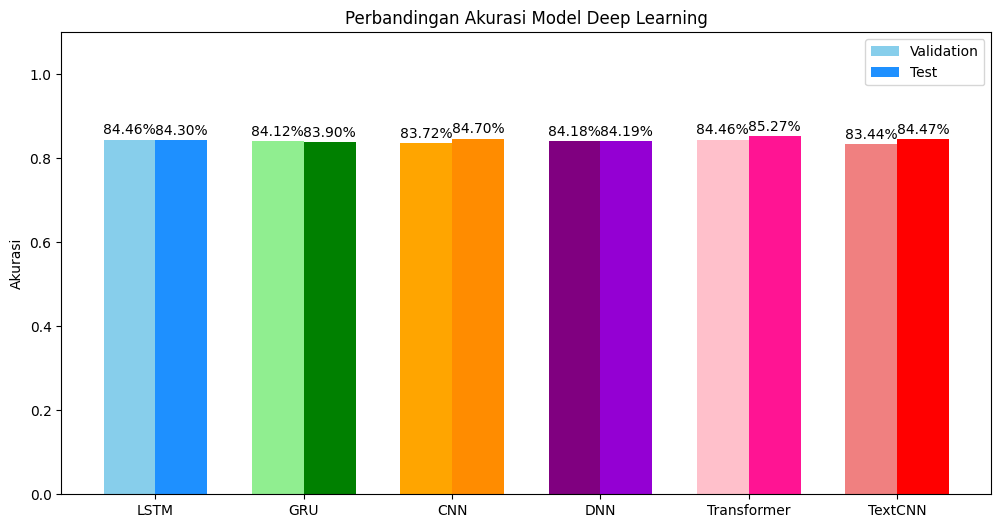

In [108]:
dl_models = {
    "LSTM": history_lstm,
    "GRU": history_gru,
    "CNN": history_cnn,
    "DNN": history_dnn,
    "Transformer": history_transformer,
    "TextCNN": history_textcnn
}

model_names_dl = list(dl_models.keys())
accuracy_val_dl = [max(history.history['val_accuracy']) for history in dl_models.values()]
accuracy_test_dl = [model.evaluate(X_test_dl, test_labels, verbose=0)[1]
                    for model, history in zip([lstm_model, gru_model, cnn_model, dnn_model, transformer_model, textcnn_model], dl_models.values())]

x = np.arange(len(model_names_dl))
width = 0.35

colors_val = ['skyblue', 'lightgreen', 'orange', 'purple', 'pink', 'lightcoral']
colors_test = ['dodgerblue', 'green', 'darkorange', 'darkviolet', 'deeppink', 'red']

plt.figure(figsize=(12,6))
bars_val = plt.bar(x - width/2, accuracy_val_dl, width, label='Validation', color=colors_val)
bars_test = plt.bar(x + width/2, accuracy_test_dl, width, label='Test', color=colors_test)

for bars in [bars_val, bars_test]:
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h+0.005, f"{h*100:.2f}%",
                 ha='center', va='bottom', fontsize=10)

plt.ylabel("Akurasi")
plt.ylim(0, 1.1)
plt.title("Perbandingan Akurasi Model Deep Learning")
plt.xticks(x, model_names_dl)
plt.legend()
plt.show()


# **Machine Learning & Deep Learning Model Accuracy Comparison**

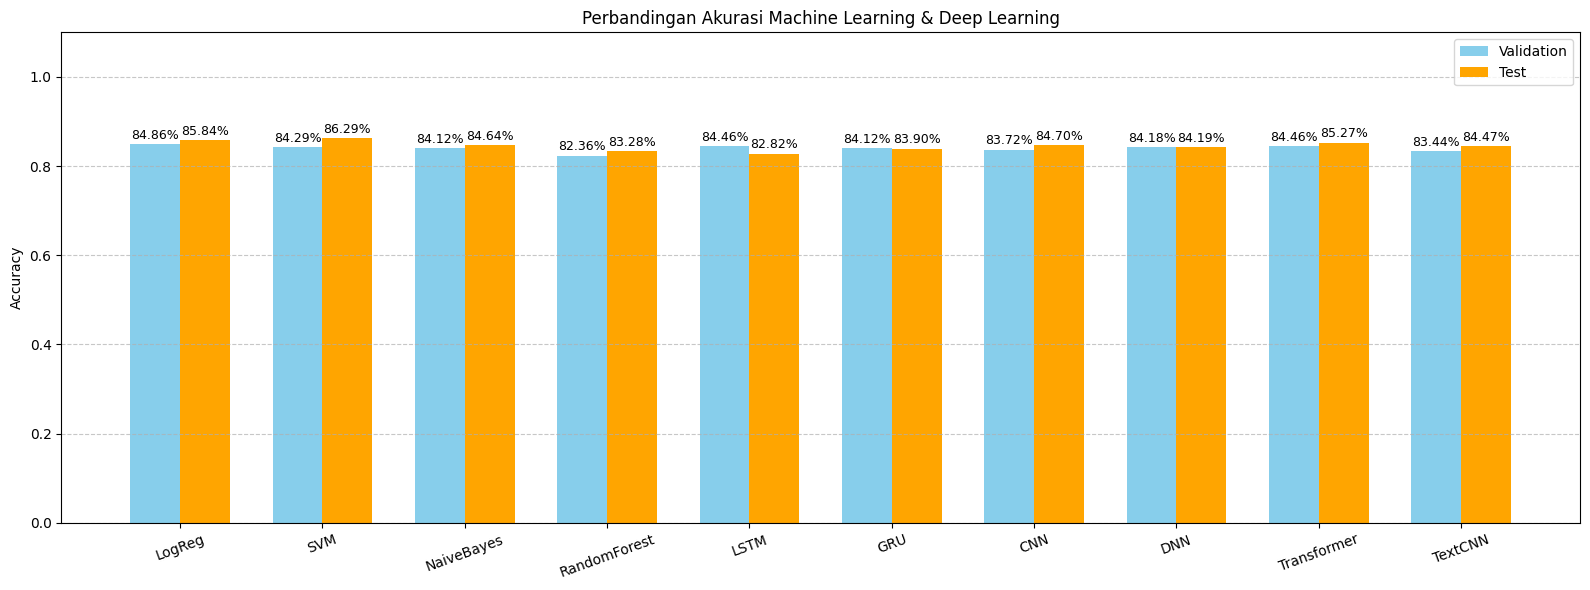

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


ml_model_names = ['LogReg', 'SVM', 'NaiveBayes', 'RandomForest']

accuracy_val_ml = [
    accuracy_score(val_labels, val_pred_logreg),
    accuracy_score(val_labels, val_pred_svm),
    accuracy_score(val_labels, val_pred_nb),
    accuracy_score(val_labels, val_pred_rf)
]

accuracy_test_ml = [
    accuracy_score(test_labels, test_pred_logreg),
    accuracy_score(test_labels, test_pred_svm),
    accuracy_score(test_labels, test_pred_nb),
    accuracy_score(test_labels, test_pred_rf)
]

dl_model_names = ['LSTM', 'GRU', 'CNN', 'DNN', 'Transformer', 'TextCNN']

accuracy_val_dl = [
    max(history_lstm.history['val_accuracy']),
    max(history_gru.history['val_accuracy']),
    max(history_cnn.history['val_accuracy']),
    max(history_dnn.history['val_accuracy']),
    max(history_transformer.history['val_accuracy']),
    max(history_textcnn.history['val_accuracy'])
]

accuracy_test_dl = [
    lstm_model.evaluate(X_test_dl, test_labels, verbose=0)[1],
    gru_model.evaluate(X_test_dl, test_labels, verbose=0)[1],
    cnn_model.evaluate(X_test_dl, test_labels, verbose=0)[1],
    dnn_model.evaluate(X_test_dl, test_labels, verbose=0)[1],
    transformer_model.evaluate(X_test_dl, test_labels, verbose=0)[1],
    textcnn_model.evaluate(X_test_dl, test_labels, verbose=0)[1]
]

all_model_names = ml_model_names + dl_model_names
all_val_acc = accuracy_val_ml + accuracy_val_dl
all_test_acc = accuracy_test_ml + accuracy_test_dl

df_comparison = pd.DataFrame({
    "Model": all_model_names,
    "Validation Accuracy": all_val_acc,
    "Test Accuracy": all_test_acc
})

x = np.arange(len(all_model_names))
width = 0.35

plt.figure(figsize=(16,6))
bars_val = plt.bar(x - width/2, all_val_acc, width, label='Validation', color='skyblue')
bars_test = plt.bar(x + width/2, all_test_acc, width, label='Test', color='orange')

for bars in [bars_val, bars_test]:
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h + 0.005, f"{h*100:.2f}%",
                 ha='center', va='bottom', fontsize=9)

plt.xticks(x, all_model_names, rotation=20)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Machine Learning & Deep Learning')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()